# **Laboratorio 4**
#### Algoritmos 2022-I

**Integrantes**

*   Santiago Cassiano Rozo
*   Juliana Catalina de Castro Moreno
*   Luis Fernando Mendez Marques
*   Ivan Alexander Morales Munoz
*   Juan Esteban Oviedo Garcia
*   Nicolás Mauricio Rincón Vija


## Se importan librerías necesarias para el desarrollo del laboratorio

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Definición de la función que representa la función polinómica f(x):

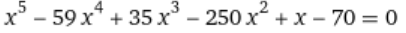

In [ ]:
# Definición de la función
def f(x):
    return (x**5) - (59*(x**4)) + (35*(x**3)) - (250*(x**2)) + (x) - 70

## Definición de una función que permite graficar el polinomio del laboratorio

In [ ]:
from matplotlib.ticker import FormatStrFormatter

def graficar(f, limite_inferior, limite_superior, tipo_grafica, num = 1000):
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param limite_inferior: límite inferior del intervalo de partida
    :param limite_superior: límite superior del intervalo de partida
    :param tipo_grafica: valor que identifica la grafica a ser mostrada 
    :param num: división del intervalo
    :return: gráfica de la función
    """

    plt.style.use('seaborn') # Modifica el aspecto visual del gráfico con un tema incorporado de la libreria
    x = np.linspace(limite_inferior, limite_superior, num) # Devuelve un número (num) de muestras espaciadas uniformemente, calculadas sobre el intervalo dado por [limite_inferior, limite_superior]
    plt.subplots(figsize=(30,5)) # Crea una figura y un eje.
    plt.plot(x, f(x))                       # Traza x vs f(x) en la figura.


    # Establecer los limites de los ejes
    if tipo_grafica == 1:
      plt.ylim(f(limite_inferior), f(limite_superior)) #Grafica completa
      plt.title("Grafica de la Funcion Completa") #Titulo de la grafica
    elif tipo_grafica == 2:
      plt.ylim(-100000000,100000000) #Grafica acotada para observar donde hay un cambio de signo
      plt.title("Grafica de la Funcion Acotada") #Titulo de la grafica
    else:
      print("\n Fail, debe ingresar el tipo de grafica entre 1 y 2 [1=Grafica Completa, 2=Grafica Acotada], mostrando grafica completa: \n")

    plt.xticks(range(-1000,1000+1,50)) #Separacion/saltos correspondientes a los valores del eje X, [Desde -1000 a 1000 de 50 en 50 valores]


    #ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    #ax.yaxis.set_ticks(np.arange(-2, 1000, 200))

    #xmin, xmax = ax.get_xlim()             # Devuelve los límites de vista del eje x.
    #ymin, ymax = ax.get_ylim()             # Devuelve los límites de vista del eje y.

    
    # Dibuja las flechas en el grafico 
    plt.axvline(x=0, c="black")
    plt.axhline(y=0, c="black") 
    #ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    #ax.annotate("", xy=(0, ymax), xytext=(0, ymin),arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))

    # Muestra en pantalla el grafico construido
    plt.show()
    return None


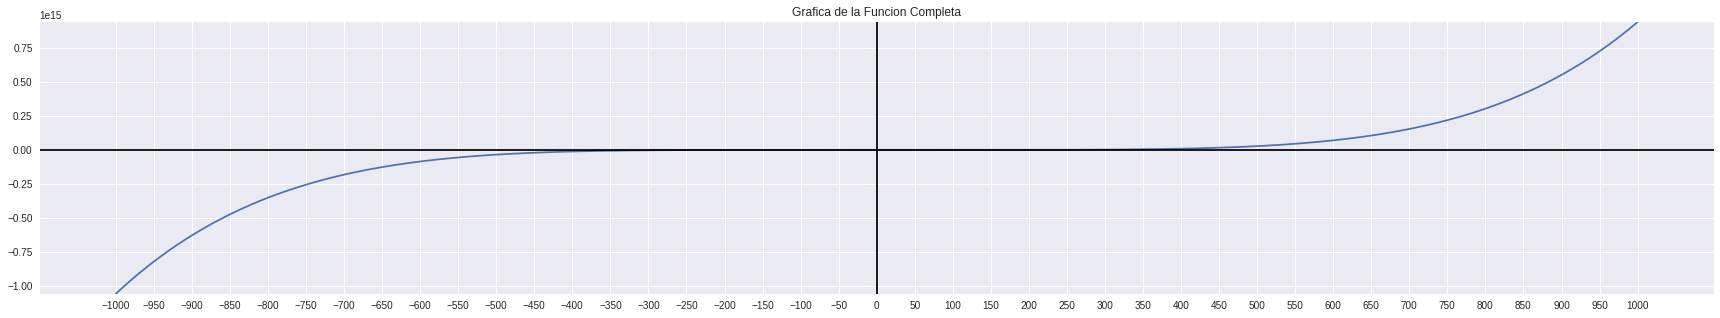

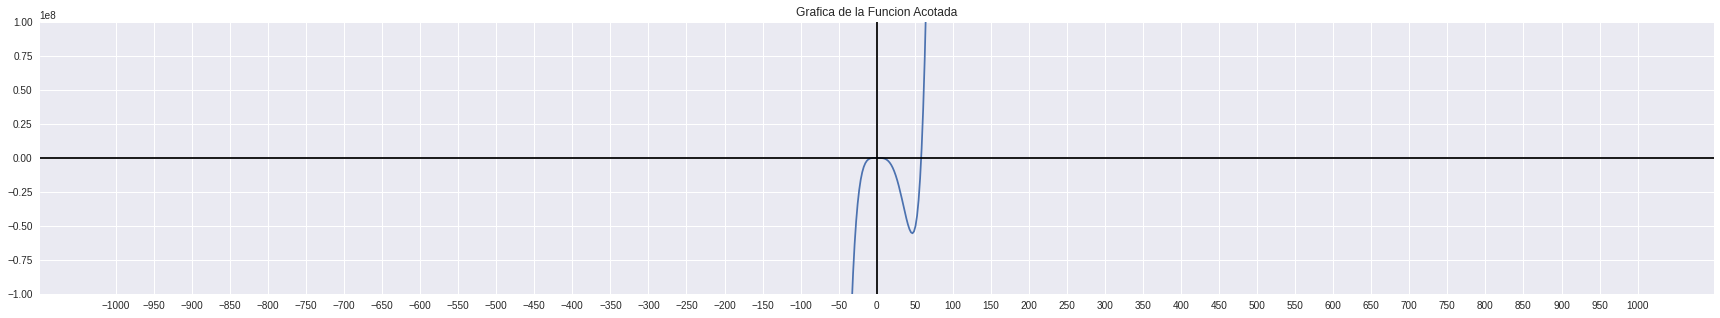

In [ ]:
graficar(f, -1000,1000,1) #Grafica Completa
graficar(f, -1000,1000,2) #Grafica Acotada

## Definición algoritmo que implementa el método de bisección para búsqueda de raices 

In [ ]:
def metodo_biseccion(f, a, b, tol=1**-4, n=50):
    """
    Método de bisección
    :param f: Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0, previamente definida
    :param a: límite inferior
    :param b: límite superior
    :param tol: toleracia, criterio de parada
    :param n: número máximo de iteraciones, criterio de parada
    :return: solución exacta o aproximada, si tiene.
    """
    # el intevalo escogido no sirve 
    if f(a)*f(b) > 0:  # O(1)
        print('El intervalo no funciona, f(a)={:.2f} y f(b)={:.2f}'.format(f(a),f(b))) # O(1)
        return None # O(1)
    
    # Calculo inicial de la convergencia. Número de cifras significativas 
    e_abs = abs(b-a) # O(1)

    # Variable de iteracion
    i = 0  # O(1)

    while i < n and e_abs > tol: # O(log n)
        # punto medio
        c = (a + b)/2  # O(1) 
        print('iteracion {:<2}: a_{:<2}={:.7f} , b_{:<2}={:.7f}, c_{:<2}={:.7f}'.format(i,i-1,a,i-1,b,i,c)) # O(1) 
         # solución exacta encontrada
        if f(c) == 0: # O(1)
            print('Solución encontrada x={:.7f}'. format(c)) # O(1)
            return c # O(1)
        # escoger intervalo izquierdo
        if f(a)*f(c)<=0:  # O(1)
            b = c         # O(1)
            c_t = a       # O(1)
        # escoger intervalo derecho
        else:  
            a = c   # O(1)
            c_t = b # O(1)
        # error absoluto
        e_abs = abs(c_t - c)  # O(1)
        # criterio de parada. Precisión requerida.
        if e_abs <= tol:  # O(1)
            print('Solución encontrada x= {:.7f}, iteraciones: {}'. format(c,i)) #O(1)
            return c # O(1)
        i += 1 # O(1)
    print('Solución no encontrada, iteraciones agotadas: {}'.format(i-1)) # O(1)
    return None # O(1)

## Análisis de Complejidad
# O(1) + O(1) + O(1) + O(1) +  O(1) + O(log n) *(13 * O(1)) + O(1) + O(1)
# O(1) + O(1) + O(1) + O(1) +  O(1) + O(log n) *(O(1)) + O(1) + O(1)
# O(1) + O(log n) * O(1)
# O(1) + O(log n)
# O(log n)

## Ejecución método de bisección y tiempo real de ejecución

In [ ]:
# Método de bisección
start_b = time.time()
print(metodo_biseccion(f, -1000, 1000, tol=1e-4, n=500))
end_b = time.time()
bitime = end_b - start_b
print(f"Tiempo de ejecucion: {end_b - start_b} segundo(s)")

iteracion 0 : a_-1=-1000.0000000 , b_-1=1000.0000000, c_0 =0.0000000
iteracion 1 : a_0 =0.0000000 , b_0 =1000.0000000, c_1 =500.0000000
iteracion 2 : a_1 =0.0000000 , b_1 =500.0000000, c_2 =250.0000000
iteracion 3 : a_2 =0.0000000 , b_2 =250.0000000, c_3 =125.0000000
iteracion 4 : a_3 =0.0000000 , b_3 =125.0000000, c_4 =62.5000000
iteracion 5 : a_4 =0.0000000 , b_4 =62.5000000, c_5 =31.2500000
iteracion 6 : a_5 =31.2500000 , b_5 =62.5000000, c_6 =46.8750000
iteracion 7 : a_6 =46.8750000 , b_6 =62.5000000, c_7 =54.6875000
iteracion 8 : a_7 =54.6875000 , b_7 =62.5000000, c_8 =58.5937500
iteracion 9 : a_8 =54.6875000 , b_8 =58.5937500, c_9 =56.6406250
iteracion 10: a_9 =56.6406250 , b_9 =58.5937500, c_10=57.6171875
iteracion 11: a_10=57.6171875 , b_10=58.5937500, c_11=58.1054688
iteracion 12: a_11=58.1054688 , b_11=58.5937500, c_12=58.3496094
iteracion 13: a_12=58.3496094 , b_12=58.5937500, c_13=58.4716797
iteracion 14: a_13=58.4716797 , b_13=58.5937500, c_14=58.5327148
iteracion 15: a_14

## Definición algoritmo que implementa fuerza bruta para búsqueda de raices

In [ ]:
def brute_force(f, a, b):
  """
  Método de fuerza bruta
  :param f: Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0, previamente definida
  :param a: límite inferior
  :param b: límite superior
  :param tol: toleracia
  :return: solución exacta o aproximada, si tiene.
  """
  # Se crea una lista con valores que tienen 0.0002 diferencia para simular intervalos de esa longitud
  dom = np.arange(a, b, 0.0002) # O(n)

  # Lista donde se van almacenar los valores postulados para ser raices reales de la función pasada como parametro
  raices = [] # O(1)

  # Se itera sobre los elementos que van a conformar intervalos de 0.0002
  for i in range(len(dom)-1): # O(n)

    # Se establece los puntos de cada posible intervalo
    inicio_intervalo = dom[i] # O(1)
    final_intervalo = dom[i+1]# O(1) 

    # Verificacion teorema de Bolzano
    if f(inicio_intervalo)*f(final_intervalo) <= 0: # O(1)
      # Se elije como valor aproximado de la raiz el punto medio del intervalo considerado en esta iteración
      # ya que se asegura que tiene un margen de error de +-0.0001 debido a la longitud del intervalo que es de 0.0002 
      raices.append((final_intervalo+inicio_intervalo) / 2) # O (1)

  return raices

## Análisis de complejidad

# O(n) + O(1) + O(n) * (O(1) + O(1) + O(1) + O(1))
# O(n) + O(n) * (O(1) + O(1) + O(1) + O(1))
# O(n) + O(n) * O(1)
# O(n) + O(n)
# O(n)

## Ejecución método por fuerza bruta y tiempo real de ejecución


In [ ]:
start = time.time()
print(brute_force(f,-1000,1000))
end = time.time()
bftime = end - start
print(f"Tiempo de ejecucion: {end-start} segundo(s)")

[58.47449973430116]
Tiempo de ejecucion: 50.711068868637085 segundo(s)


Creación archivo times.txt para almacenar los tiempos de ejecución


In [ ]:
ft = open("times.txt", "w+")
ft.write(f"Tiempo Algoritmo Bisección: {bitime}\n")
ft.write(f"Tiempo Algoritmo Fuerza Bruta: {bftime}")
ft.close()